In [0]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/deepanshuMeteor/ComputerVision/refs/heads/main/data.csv"
df = pd.read_csv(url)





In [0]:
# Display the first 10 rows of the DataFrame
print(df.head(10))



         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678
5    843786         M  ...          0.3985                  0.12440
6    844359         M  ...          0.3063                  0.08368
7  84458202         M  ...          0.3196                  0.11510
8    844981         M  ...          0.4378                  0.10720
9  84501001         M  ...          0.4366                  0.20750

[10 rows x 32 columns]


In [0]:
# Print missing values in each column
print("Missing values in each column:")
print(df.isna().sum())

Missing values in each column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [0]:
# Convert categorical variable 'diagnosis' to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # M = malignant, B = benign



In [0]:
# Step 3: Split the Data
# Define features (X) and target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Model
# Initialize th
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
# Make predictions
y_pred = model.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




Accuracy: 0.96


In [0]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [0]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)



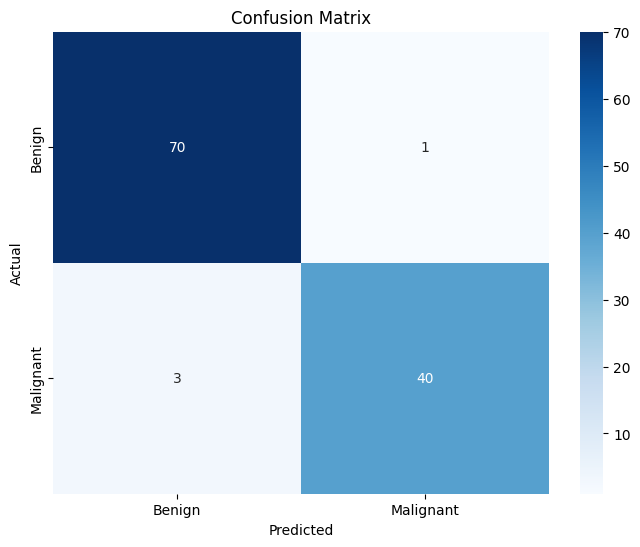

In [0]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()